In [4]:
!pip install kaggle
from google.colab import files

# Create a Kaggle API token
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# Copy the API token from Kaggle into the kaggle.json file
# You can find your API token in your Kaggle account settings
!echo '{"username":"your_kaggle_username","key":"your_kaggle_key"}' > ~/.kaggle/kaggle.json

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset

# Unzip the dataset
!unzip bank-customer-churn-dataset.zip

# Print the contents of the dataset directory
!ls


mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
License(s): other
  0% 0.00/187k [00:00<?, ?B/s]
100% 187k/187k [00:00<00:00, 60.4MB/s]
Archive:  bank-customer-churn-dataset.zip
  inflating: Bank Customer Churn Prediction.csv  
 bank-customer-churn-dataset.zip  'Bank Customer Churn Prediction.csv'	 sample_data


In [2]:
#Read the dataset
import pandas as pd
data=pd.read_csv(r'D:\Churn Prediction\Data\Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#summary statistics
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
#check for missing values
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
#check datatypes
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

EXPLORATORY DATA ANALYSIS

Unirative analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


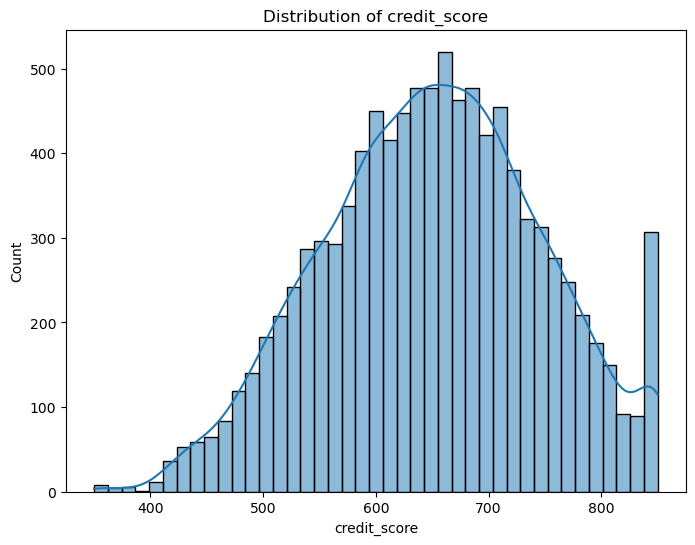

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


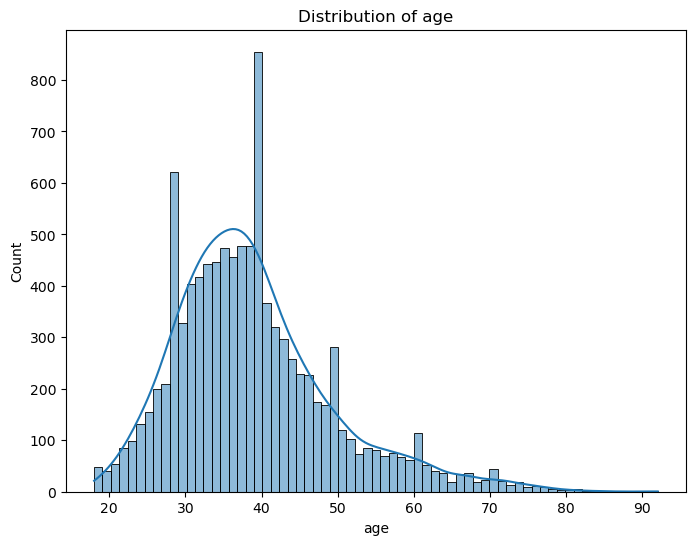

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


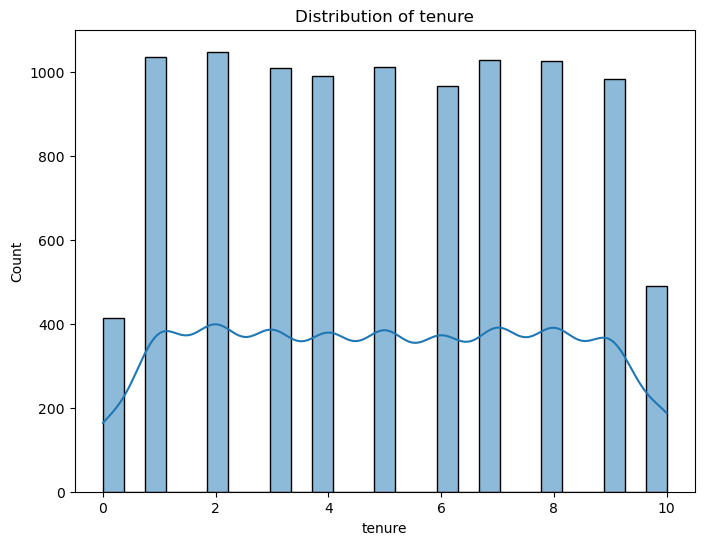

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


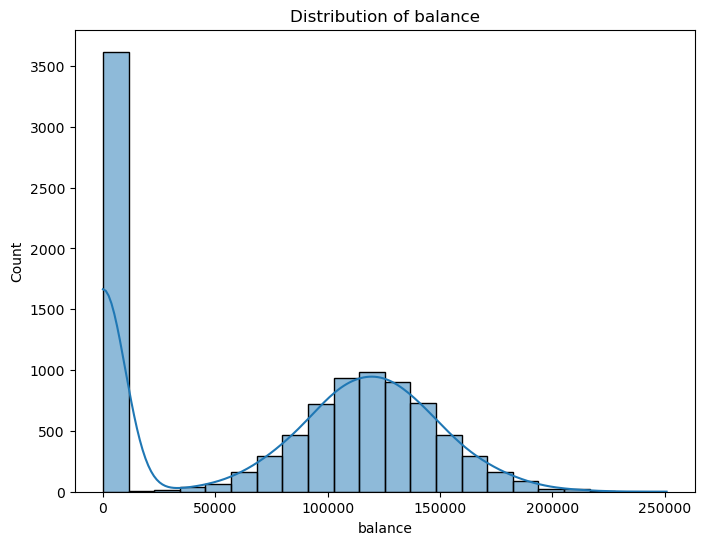

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


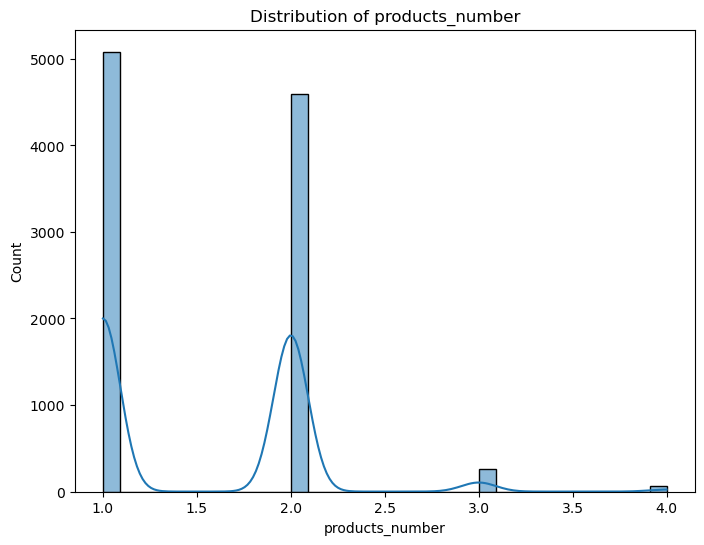

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


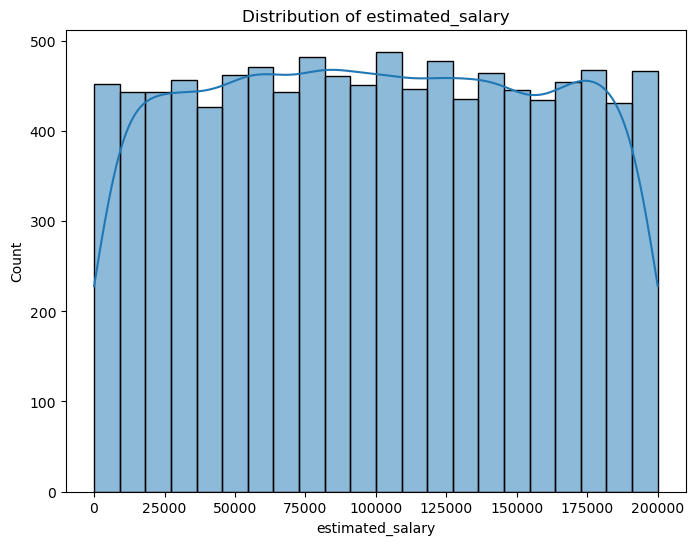

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot distribution for numerical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

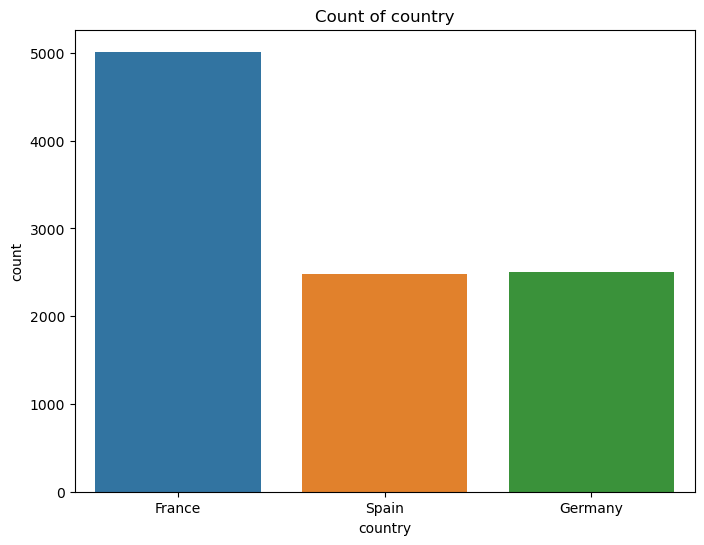

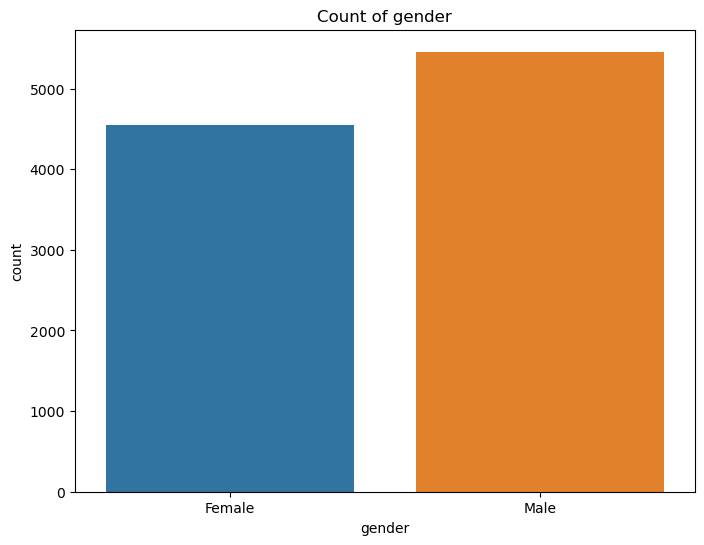

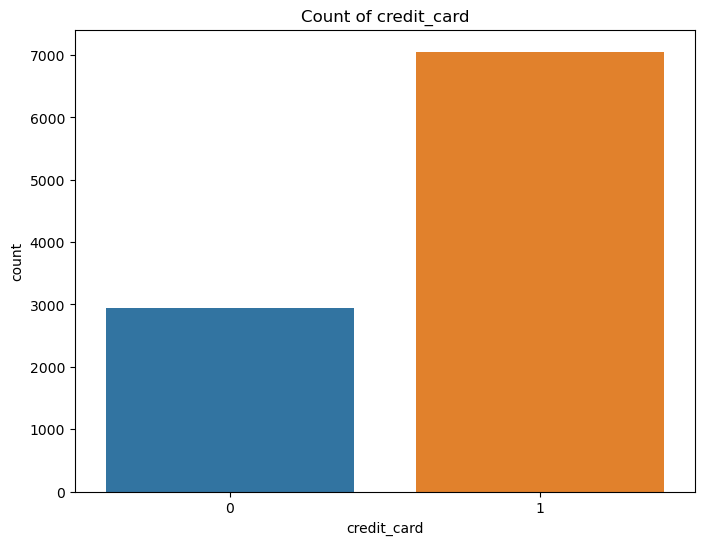

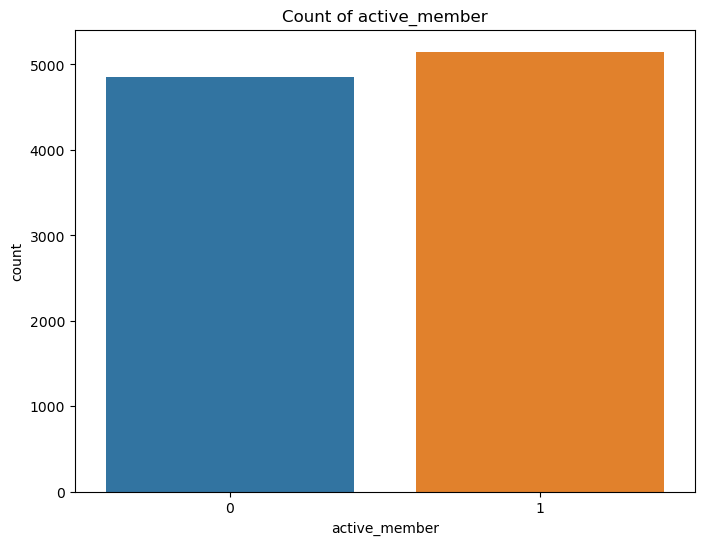

In [7]:
#plot counts for categorical features
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count of {feature}')
    plt.show()

Birative analysis

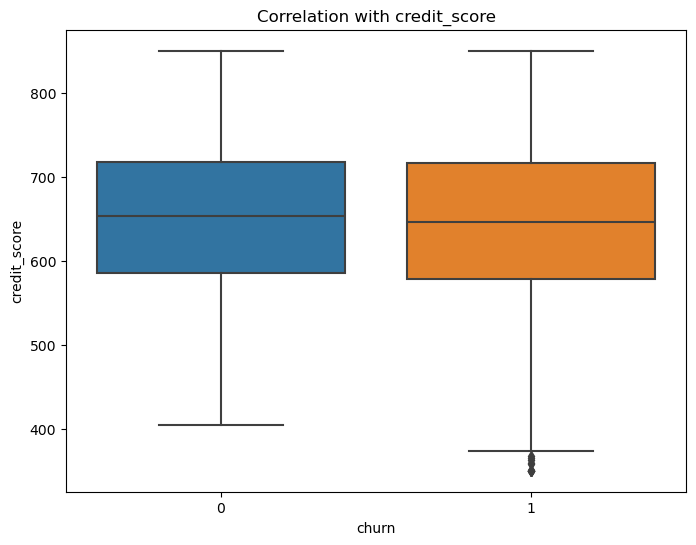

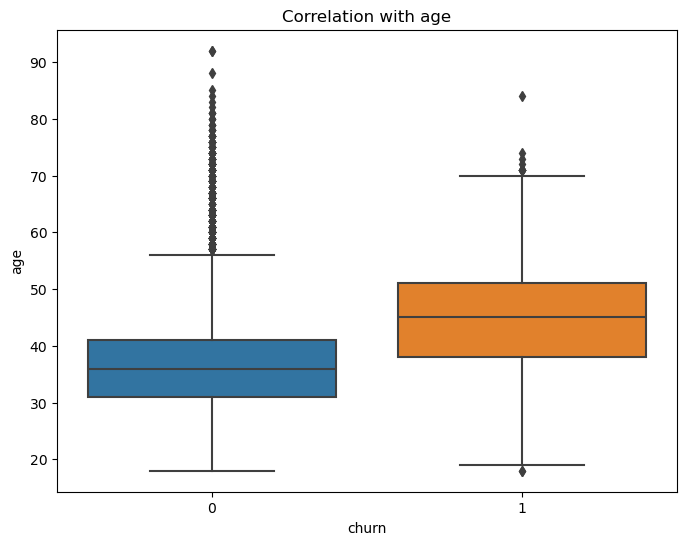

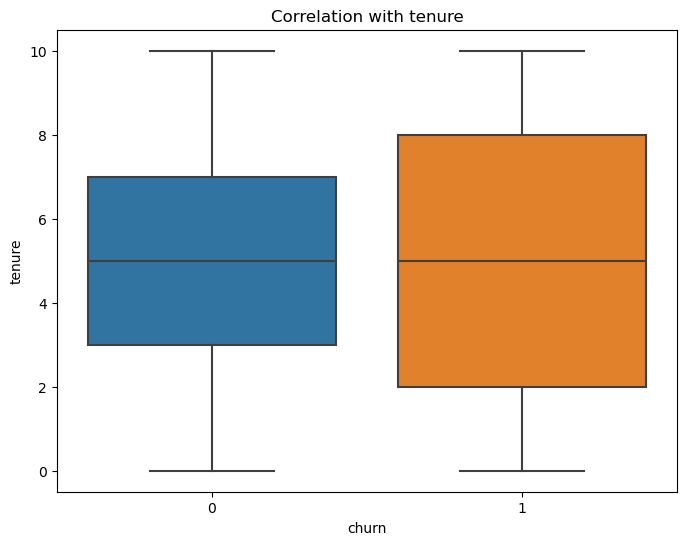

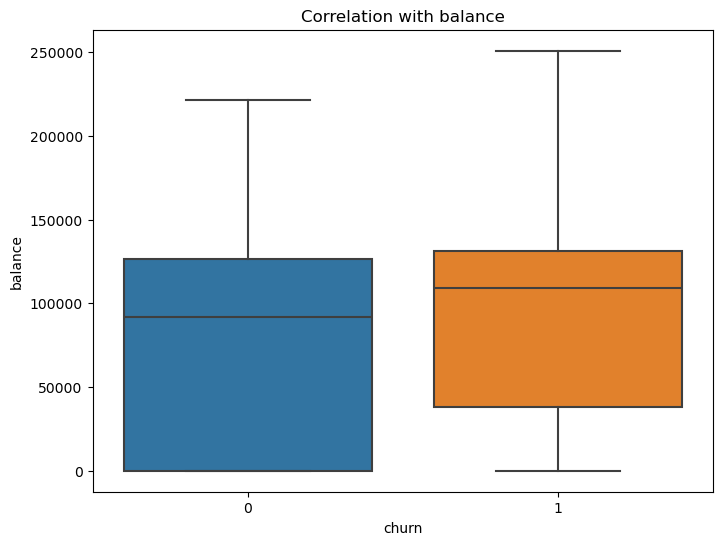

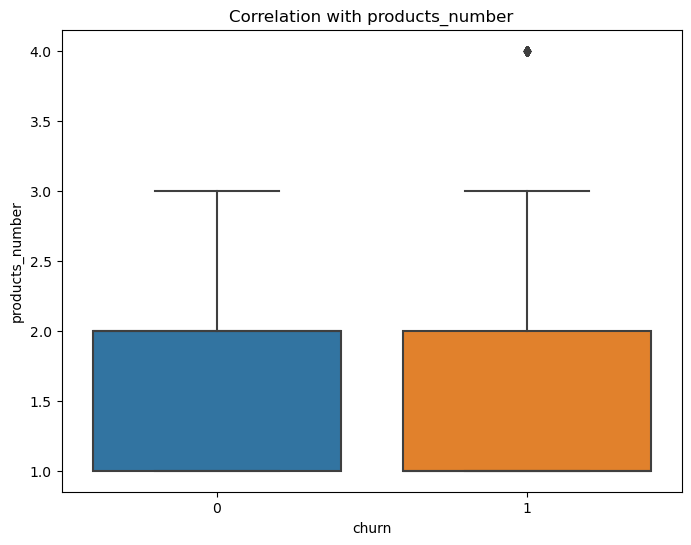

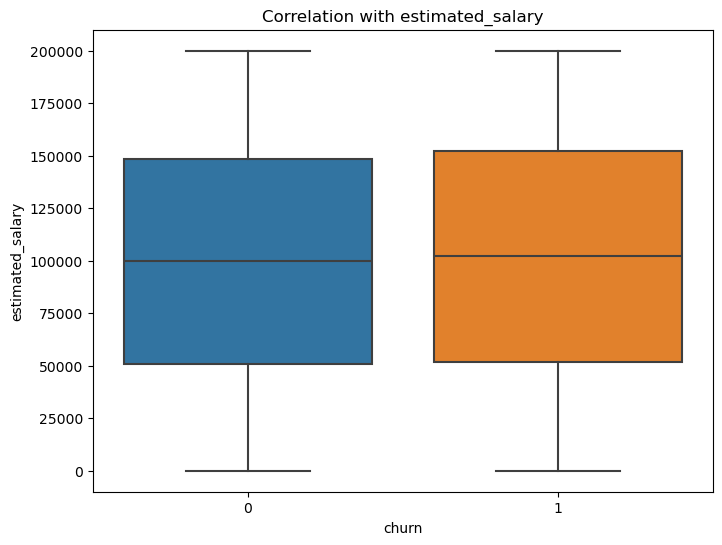

In [9]:
#plot correlations with the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'Correlation with {feature}')

In [1]:
import sklearn 
print(sklearn.__version__)

1.5.1


Data Preparation

In [4]:
import pandas as pd
data1=pd.read_csv(r'D:\Churn Prediction\Data\data1.csv')
X=data1.drop(columns=['churn'])
y=data1['churn']

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [6]:
y.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

In [7]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [8]:
# Standardize numerical features
scaler1 = StandardScaler()
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
X[numerical_features] = scaler1.fit_transform(X[numerical_features])

In [9]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.325765,0,0,0.102643,-1.039670,-1.334212,-0.731565,1,1,0.014250
1,-0.445380,2,0,0.002814,-1.406431,0.030731,-0.731565,0,1,0.208182
2,-1.598041,0,0,0.102643,1.160895,1.266115,2.738033,1,0,0.232246
3,0.544168,0,0,-0.196842,-1.406431,-1.334212,1.003234,0,0,-0.116073
4,2.186166,2,0,0.202471,-1.039670,0.709929,-0.731565,1,1,-0.371488


In [10]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [11]:
X_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
13555,1.163995,0,0,0.701613,0.060612,0.447507,-0.731565,0,0,1.446392
1665,1.087876,0,1,0.102643,-1.406431,0.779406,1.003234,0,1,0.745189
14878,-0.586744,1,1,-0.596156,-1.039670,1.043868,-0.731565,1,0,-0.769948
7471,0.098328,1,0,1.400412,1.160895,0.609231,-0.731565,0,1,0.327675
2582,0.076579,0,0,0.501956,0.060612,0.512720,1.003234,1,1,0.663944


In [12]:
model= RandomForestClassifier(n_estimators=100, criterion="gini")
model.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_pred = model.predict(X_test)

#evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8612680477087257
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

[[1389  244]
 [ 198 1355]]


In [14]:
# Save the model to a file
joblib.dump(model, 'model.joblib')
joblib.dump(scaler1, 'scaler.joblib')

['scaler.joblib']

In [33]:
model2= LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred2 = model2.predict(X_test)

#evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred2)}')
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Accuracy: 0.763653483992467
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1633
           1       0.75      0.77      0.76      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186

[[1241  392]
 [ 361 1192]]


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
model3 = Sequential()

In [37]:
#Add input layer and two hidden layer
model3.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dropout(0.3))
model3.add(Dense(units=32, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(units=1, activation='sigmoid'))

In [38]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
metrics=[
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [40]:
#compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [41]:
#Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [42]:
#train the model
history = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
399/399 [==============================] - 4s 6ms/step - loss: 0.5388 - accuracy: 0.7339 - precision: 0.7526 - recall: 0.7019 - val_loss: 0.4481 - val_accuracy: 0.7891 - val_precision: 0.7694 - val_recall: 0.8100
Epoch 2/50
399/399 [==============================] - 2s 5ms/step - loss: 0.4603 - accuracy: 0.7894 - precision: 0.7884 - recall: 0.7947 - val_loss: 0.4242 - val_accuracy: 0.8026 - val_precision: 0.7766 - val_recall: 0.8352
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4418 - accuracy: 0.7996 - precision: 0.8057 - recall: 0.7930 - val_loss: 0.4078 - val_accuracy: 0.8139 - val_precision: 0.7934 - val_recall: 0.8358
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4310 - accuracy: 0.8047 - precision: 0.8081 - recall: 0.8023 - val_loss: 0.4000 - val_accuracy: 0.8142 - val_precision: 0.8020 - val_recall: 0.8216
Epoch 5/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4236 - accuracy: 0.8104 - pr

In [43]:
#evaluate the model
loss, accuracy, precision, recall = model3.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

100/100 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8456 - precision: 0.8394 - recall: 0.8448
Loss: 0.3626
Accuracy: 0.8456
Precision: 0.8394
Recall: 0.8448


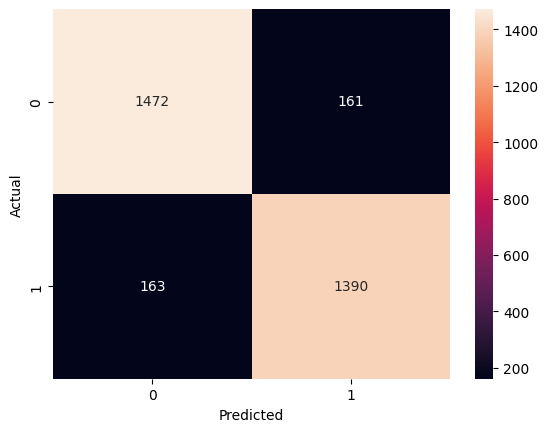

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
#save my randomforest model
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

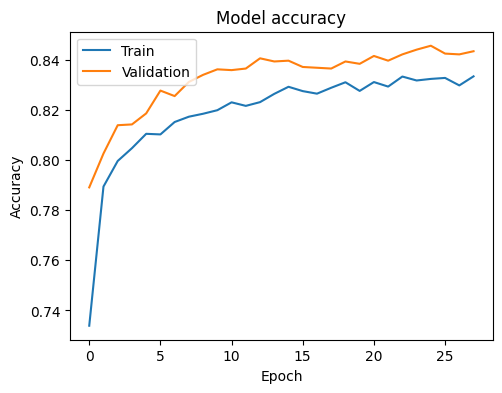

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

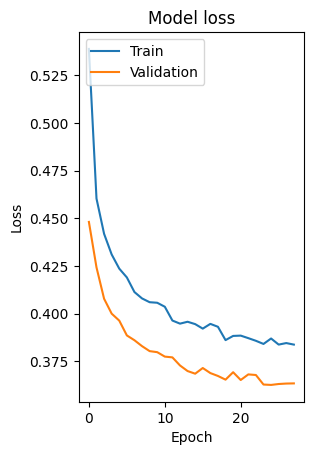

In [46]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [16]:
#save the scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler1, f)
